In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [133]:
df = pd.read_csv("../datasets/Iris.csv")
df = df.drop(columns=["Id"], axis=1)

print(df.shape)
df.head()

(150, 5)


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [134]:
X = df.drop("Species", axis=1).copy()
y = df["Species"].copy()

In [135]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105,), (45, 4), (45,))

# Decision Tree

In [136]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

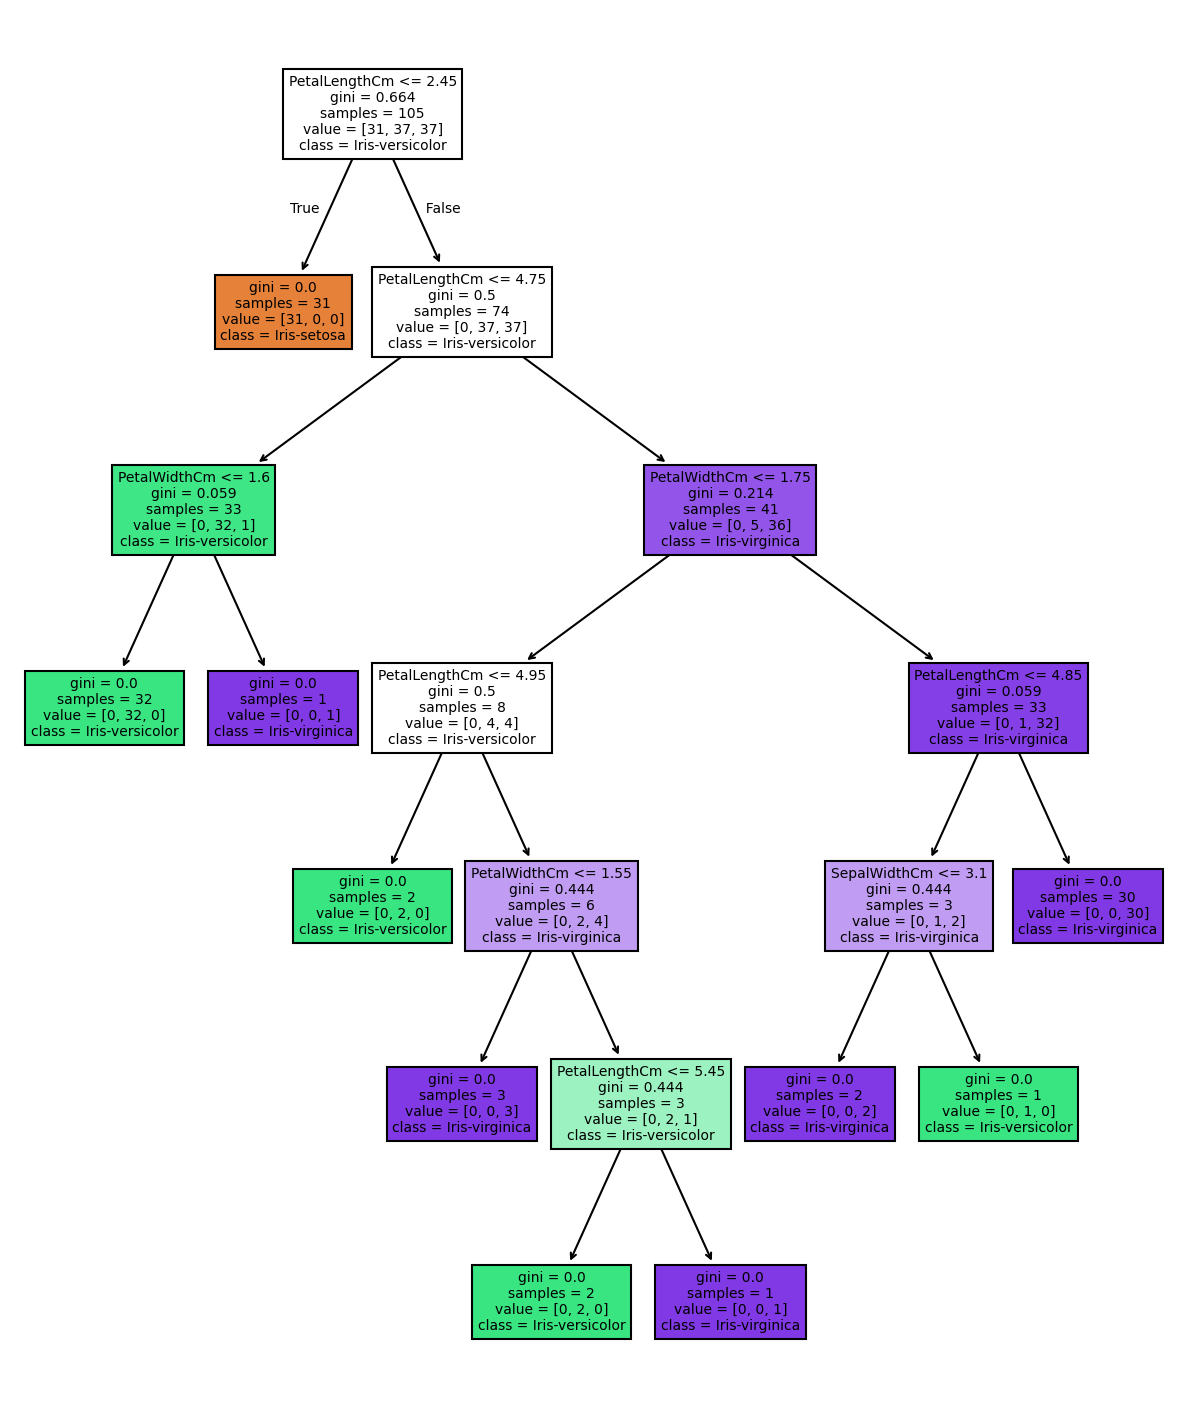

In [137]:
plt.figure(figsize=(10, 12), dpi=150)
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=dt_model.classes_,
    filled=True,
)
plt.show()

In [138]:
dt_preds = dt_model.predict(X_test)

test_data = df.loc[X_test.index].copy()
test_data["Decision Tree Predictions"] = dt_preds
test_data

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
73             6.1           2.8            4.7           1.2   
18             5.7           3.8            1.7           0.3   
118            7.7           2.6            6.9           2.3   
78             6.0           2.9            4.5           1.5   
76             6.8           2.8            4.8           1.4   
31             5.4           3.4            1.5           0.4   
64             5.6           2.9            3.6           1.3   
141            6.9           3.1            5.1           2.3   
68             6.2           2.2            4.5           1.5   
82             5.8           2.7            3.9           1.2   
110            6.5           3.2            5.1           2.0   
12             4.8           3.0            1.4           0.1   
36             5.5           3.5            1.3           0.2   
9              4.9           3.1            1.5           0.1   
19             5.1           3.8            1.5           0.3   
56             6.3           3.3            4.7           1.6   
104            6.5           3.0            5.8           2.2   
69             5.6           2.5            3.9           1.1   
55             5.7           2.8            4.5           1.3   
132            6.4           2.8            5.6           2.2   
29             4.7           3.2            1.6           0.2   
127            6.1           3.0            4.9           1.8   
26             5.0           3.4            1.6           0.4   
128            6.4           2.8            5.6           2.1   
131            7.9           3.8            6.4           2.0   
145            6.7           3.0            5.2           2.3   
108            6.7           2.5            5.8           1.8   
143            6.8           3.2            5.9           2.3   
45             4.8           3.0            1.4           0.3   
30             4.8           3.1            1.6           0.2   
22             4.6           3.6            1.0           0.2   
15             5.7           4.4            1.5           0.4   
65             6.7           3.1            4.4           1.4   
11             4.8           3.4            1.6           0.2   
42             4.4           3.2            1.3           0.2   
146            6.3           2.5            5.0           1.9   
51             6.4           3.2            4.5           1.5   
27             5.2           3.5            1.5           0.2   
4              5.0           3.6            1.4           0.2   
32             5.2           4.1            1.5           0.1   
142            5.8           2.7            5.1           1.9   
85             6.0           3.4            4.5           1.6   
86             6.7           3.1            4.7           1.5   
16             5.4           3.9            1.3           0.4   
10             5.4           3.7            1.5           0.2   

             Species Decision Tree Predictions  
73   Iris-versicolor           Iris-versicolor  
18       Iris-setosa               Iris-setosa  
118   Iris-virginica            Iris-virginica  
78   Iris-versicolor           Iris-versicolor  
76   Iris-versicolor           Iris-versicolor  
31       Iris-setosa               Iris-setosa  
64   Iris-versicolor           Iris-versicolor  
141   Iris-virginica            Iris-virginica  
68   Iris-versicolor           Iris-versicolor  
82   Iris-versicolor           Iris-versicolor  
110   Iris-virginica            Iris-virginica  
12       Iris-setosa               Iris-setosa  
36       Iris-setosa               Iris-setosa  
9        Iris-setosa               Iris-setosa  
19       Iris-setosa               Iris-setosa  
56   Iris-versicolor           Iris-versicolor  
104   Iris-virginica            Iris-virginica  
69   Iris-versicolor           Iris-versicolor  
55   Iris-versicolor           Iris-versicolor  
132   Iris-virginica            Ir

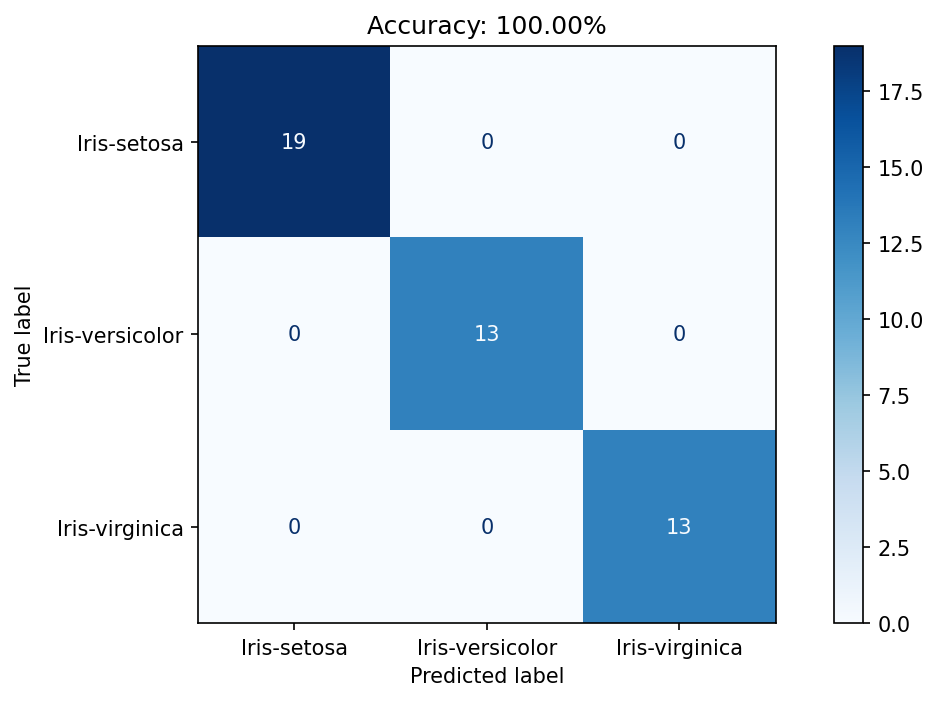

In [139]:
cm = confusion_matrix(y_test, dt_preds)

fig, ax = plt.subplots(figsize=(10, 5), dpi=150)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap="Blues", ax=ax)

plt.title(f"Accuracy: {accuracy_score(y_test, dt_preds) * 100:.2f}%")
plt.show()

# Random Forest Classifier

In [144]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [145]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(30, 50), dpi=200)

axes = axes.ravel()

for i, tree in enumerate(rf_model.estimators_):
    ax = axes[i]
    
    plot_tree(
        tree,
        feature_names=X_train.columns,
        class_names=rf_model.classes_,
        filled=True,
        ax=ax
    )
    
    ax.set_title(f'Tree {i+1}')

plt.tight_layout()
plt.show()

In [146]:
rf_preds = rf_model.predict(X_test)

test_data["Random Forest Predictions"] = rf_preds
test_data

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
73             6.1           2.8            4.7           1.2   
18             5.7           3.8            1.7           0.3   
118            7.7           2.6            6.9           2.3   
78             6.0           2.9            4.5           1.5   
76             6.8           2.8            4.8           1.4   
31             5.4           3.4            1.5           0.4   
64             5.6           2.9            3.6           1.3   
141            6.9           3.1            5.1           2.3   
68             6.2           2.2            4.5           1.5   
82             5.8           2.7            3.9           1.2   
110            6.5           3.2            5.1           2.0   
12             4.8           3.0            1.4           0.1   
36             5.5           3.5            1.3           0.2   
9              4.9           3.1            1.5           0.1   
19             5.1           3.8            1.5           0.3   
56             6.3           3.3            4.7           1.6   
104            6.5           3.0            5.8           2.2   
69             5.6           2.5            3.9           1.1   
55             5.7           2.8            4.5           1.3   
132            6.4           2.8            5.6           2.2   
29             4.7           3.2            1.6           0.2   
127            6.1           3.0            4.9           1.8   
26             5.0           3.4            1.6           0.4   
128            6.4           2.8            5.6           2.1   
131            7.9           3.8            6.4           2.0   
145            6.7           3.0            5.2           2.3   
108            6.7           2.5            5.8           1.8   
143            6.8           3.2            5.9           2.3   
45             4.8           3.0            1.4           0.3   
30             4.8           3.1            1.6           0.2   
22             4.6           3.6            1.0           0.2   
15             5.7           4.4            1.5           0.4   
65             6.7           3.1            4.4           1.4   
11             4.8           3.4            1.6           0.2   
42             4.4           3.2            1.3           0.2   
146            6.3           2.5            5.0           1.9   
51             6.4           3.2            4.5           1.5   
27             5.2           3.5            1.5           0.2   
4              5.0           3.6            1.4           0.2   
32             5.2           4.1            1.5           0.1   
142            5.8           2.7            5.1           1.9   
85             6.0           3.4            4.5           1.6   
86             6.7           3.1            4.7           1.5   
16             5.4           3.9            1.3           0.4   
10             5.4           3.7            1.5           0.2   

             Species Decision Tree Predictions Random Forest Predictions  
73   Iris-versicolor           Iris-versicolor           Iris-versicolor  
18       Iris-setosa               Iris-setosa               Iris-setosa  
118   Iris-virginica            Iris-virginica            Iris-virginica  
78   Iris-versicolor           Iris-versicolor           Iris-versicolor  
76   Iris-versicolor           Iris-versicolor           Iris-versicolor  
31       Iris-setosa               Iris-setosa               Iris-setosa  
64   Iris-versicolor           Iris-versicolor           Iris-versicolor  
141   Iris-virginica            Iris-virginica            Iris-virginica  
68   Iris-versicolor           Iris-versicolor           Iris-versicolor  
82   Iris-versicolor           Iris-versicolor           Iris-versicolor  
110   Iris-virginica            Iris-virginica            Iris-virginica  
12       Iris-setosa               Iris-setosa               Iris-setosa  
36       Iris-setosa               Iris

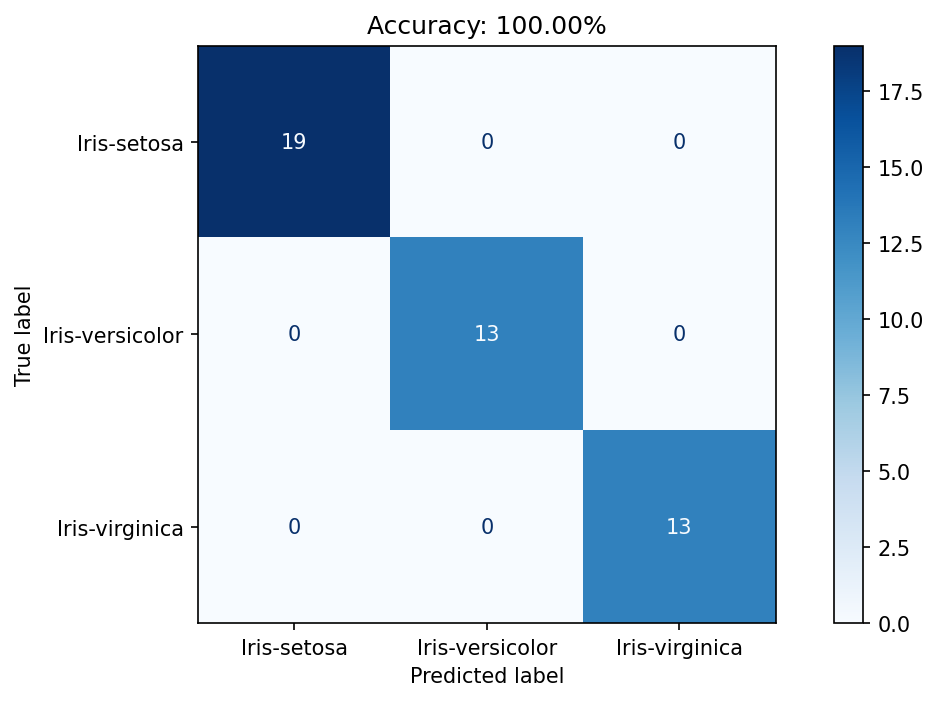

In [147]:
cm = confusion_matrix(y_test, rf_preds)

fig, ax = plt.subplots(figsize=(10, 5), dpi=150)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues", ax=ax)

plt.title(f"Accuracy: {accuracy_score(y_test, rf_preds) * 100:.2f}%")
plt.show()